In [ ]:
import re
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


import string
string.punctuation
from nltk.tokenize import TweetTokenizer
from nltk.tokenize.api import TokenizerI
from nltk.stem import StemmerI, WordNetLemmatizer

!pip install contractions
import contractions
from typing import List

import matplotlib.pyplot as plt
from matplotlib.figure import Figure

from scipy import sparse
from sklearn.preprocessing import StandardScaler    # only for std on csr_matrix

np.random.seed(1234)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vrajp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vrajp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vrajp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vrajp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Dataset_1: NewsGroup20

We load the data from sklearn and remove headers, footers and quotes from both train and test set.

In [ ]:
newsgroup20_train = fetch_20newsgroups(subset='train', remove=(['headers', 'footers', 'quotes']))
newsgroup20_test = fetch_20newsgroups(subset='test', remove=(['headers', 'footers', 'quotes']))

In [ ]:
#print(newsgroup20_train['target'])
# print out the haeder names
list(newsgroup20_train)

['data', 'filenames', 'target_names', 'target', 'DESCR']

In [ ]:
newsgroup20_train.target_names
newsgroup20_train.data
newsgroup20_train.target

array([7, 4, 4, ..., 3, 1, 8])

Storing the dataset as pandas datframe and calculating it's t-table info.

In [ ]:
# training dataframe
newsgroup20_train_df = pd.DataFrame(newsgroup20_train.data, columns=['text'])
newsgroup20_train_df['target'] = newsgroup20_train.target

# testing dataframe
newsgroup20_test_df = pd.DataFrame(newsgroup20_test.data, columns=['text'])
newsgroup20_test_df['target'] = newsgroup20_test.target

newsgroup20_train_df.info()
newsgroup20_train_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


,count,mean,std,min,25%,50%,75%,max
target,11314.0,9.293,5.562719,0.0,5.0,9.0,14.0,19.0


In [ ]:
newsgroup20_test_df.info()
newsgroup20_test_df.describe().T
#newsgroup20_test_df = newsgroup20_test_df.drop(columns='num_words')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7532 entries, 0 to 7531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7532 non-null   object
 1   target  7532 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 88.4+ KB


,count,mean,std,min,25%,50%,75%,max
target,7532.0,9.293415,5.563286,0.0,5.0,9.0,14.0,19.0


In [ ]:
#newsgroup20_test_df = newsgroup20_test_df.drop(columns='num_words')
newsgroup20_test_df

,text,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19
...,...,...
7527,"\n Henry, if I read you correctly, you may b...",14
7528,"about\nthem on\n\nActually, I thought Macs wer...",4
7529,"I sent a version of this post out a while ago,...",9
7530,I have this kit which includes the following :...,6


Some general analization of data to see the total frequency of words, vocabularies or sentences for the whole datarame.

In [ ]:
newsgroup20_train_df['num_char'] = newsgroup20_train_df['text'].str.len()
newsgroup20_train_df['num_words'] = newsgroup20_train_df['text'].str.split().str.len()
newsgroup20_train_df['num_vocab'] = newsgroup20_train_df['text'].str.lower().str.split().apply(set).str.len()

newsgroup20_train_df['avg_word_length'] = newsgroup20_train_df['num_char'] / newsgroup20_train_df['num_words']
# a variable that captures the number of sentences per text
newsgroup20_train_df['num_sent'] = newsgroup20_train_df['text'].apply(sent_tokenize).apply(len)

## 1. Plotting number_of_total_words for each class in train_set

In [ ]:
def plot_features(df, text_var):
    nb_rows =5
    nb_cols =4
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20,20))
    plt.subplots_adjust(wspace=None, hspace=0.8)
    n=0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].hist(df[df.target == n][text_var], bins=20, color='r')
            axs[i, j].set_title(text_var + ' | ' + str(n))
            n+=1
    plt.show()

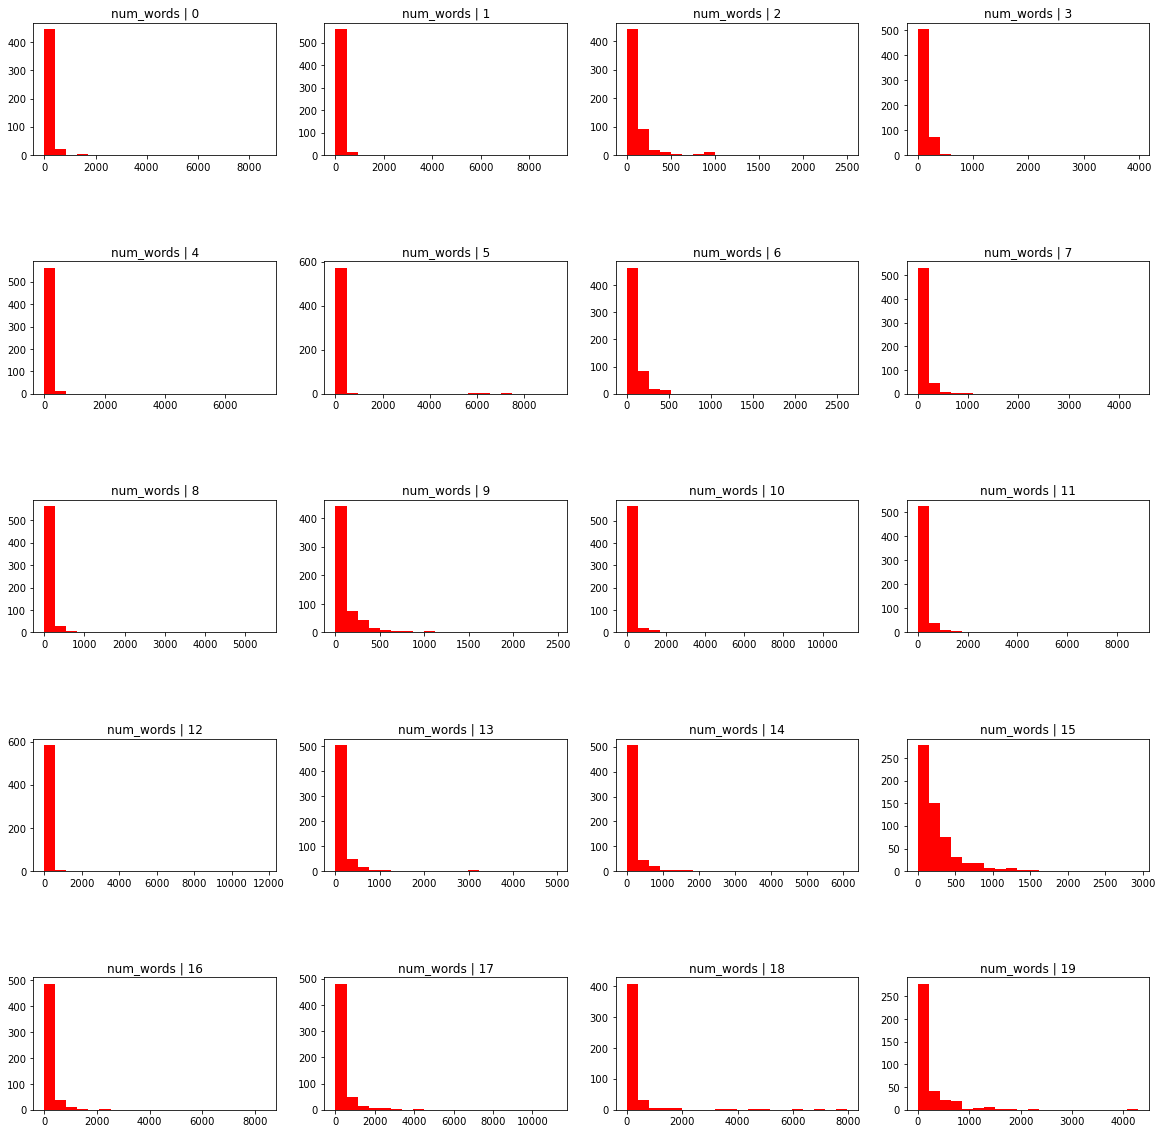

In [ ]:
plot_features(newsgroup20_train_df, 'num_words')
# plots text_frequency in each class

## 2. Plotting number_of_total_words for each class in test_set

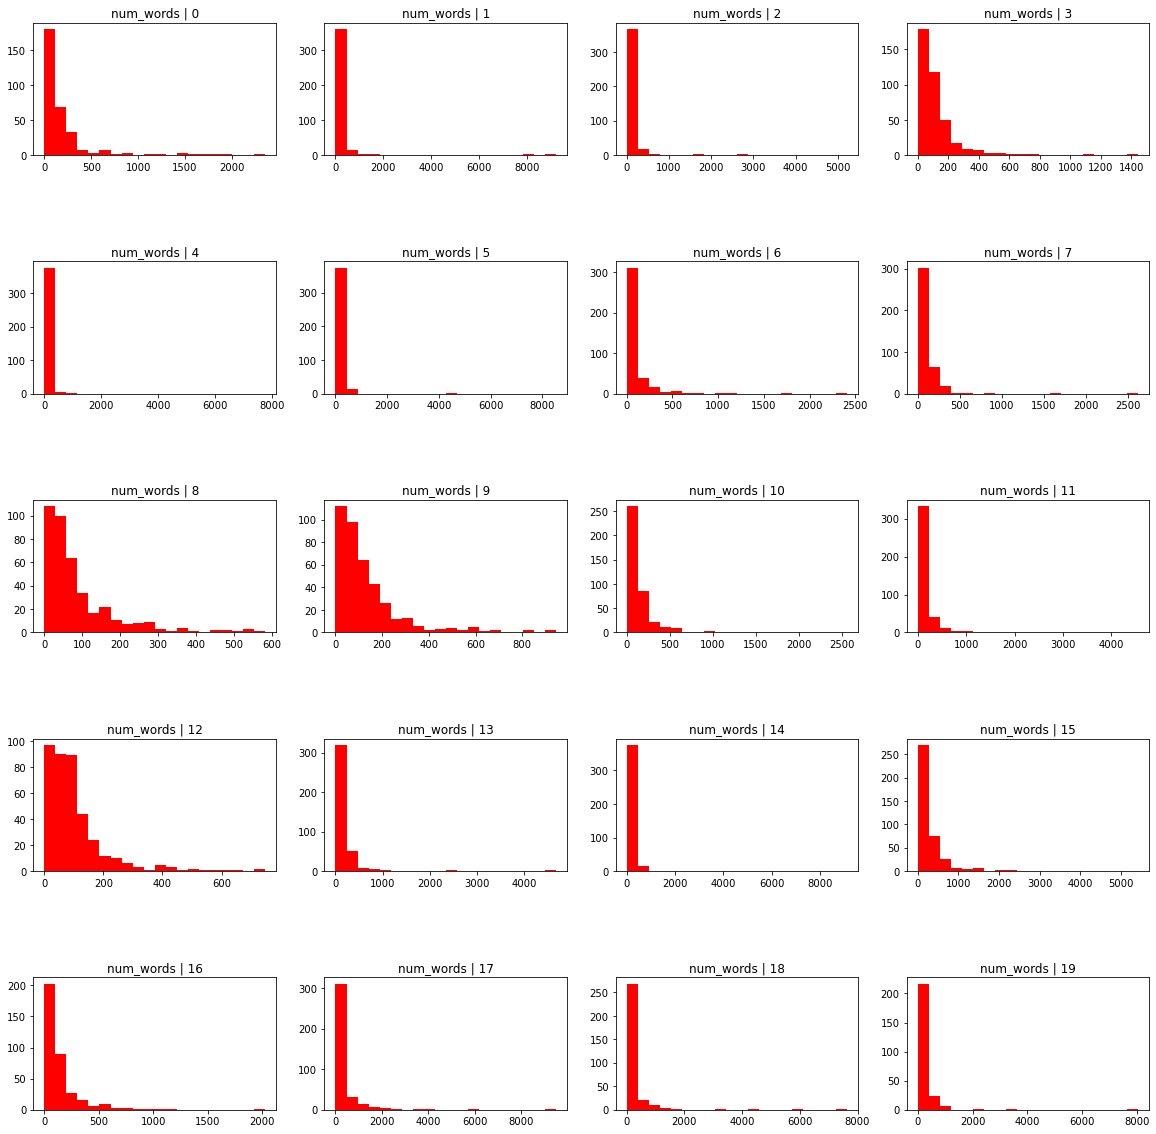

In [ ]:
newsgroup20_test_df['num_words'] = newsgroup20_test_df['text'].str.split().str.len()
plot_features(newsgroup20_test_df, 'num_words')

In [ ]:
targets_train, freq_train = np.unique(newsgroup20_train.target, return_counts=True)
targets_string_train = np.array(newsgroup20_train.target_names)
print(list(zip(targets_string_train, freq_train)))

targets_test, freq_test = np.unique(newsgroup20_test.target, return_counts=True)
targets_string_test = np.array(newsgroup20_test.target_names)
print(list(zip(targets_string_test, freq_train)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]
[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideas

## Plotting Distribution of classes 

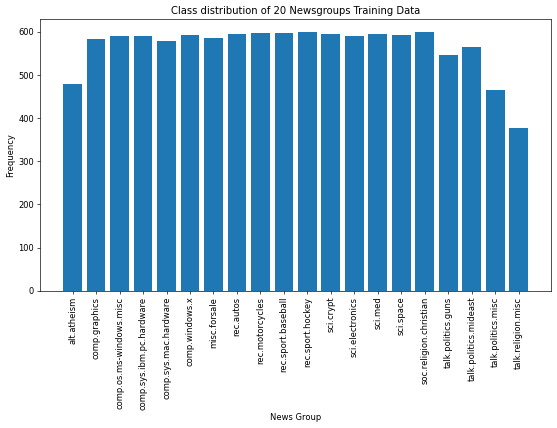

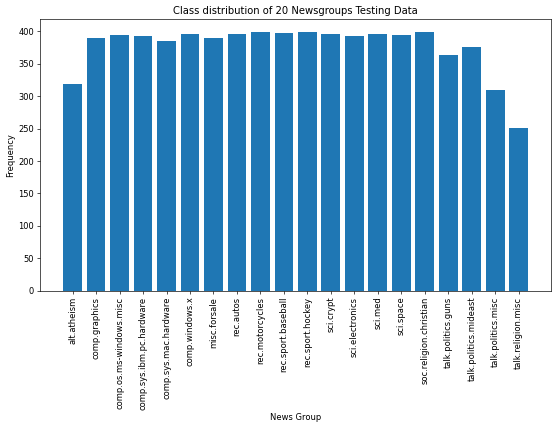

In [ ]:
def plot_figure(targets_string, freq, title, xlabel, ylabel):
    fig=plt.figure(figsize=(11, 6), dpi= 60)
    plt.bar(targets_string,freq)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_figure(targets_string_train, freq_train, 'Class distribution of 20 Newsgroups Training Data', 'News Group', 'Frequency')
plot_figure(targets_string_test, freq_test, 'Class distribution of 20 Newsgroups Testing Data', 'News Group', 'Frequency')

## Data cleaning and preprocessing

We remove any alphanumerics from the texts since they do not partain any useful meaning for out classification model.

In [ ]:
# replacing alpha-numerics with whitespace
newsgroup20_train_df['text'] = newsgroup20_train_df['text'].str.replace('[^\w\s]','').str.replace('\d+', '')

C:\Users\vrajp\AppData\Local\Temp/ipykernel_7352/2956911104.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  newsgroup20_train_df['text'] = newsgroup20_train_df['text'].str.replace('[^\w\s]','').str.replace('\d+', '')


## Extracting Feature Vectors using CountVetorizer and tfidfTransformer

In [ ]:
vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             min_df=0.001)
vectorizer_transformer = vectorizer.fit(newsgroup20_train_df['text'])
x_train_cv = vectorizer_transformer.fit_transform(newsgroup20_train_df['text']) #bag of words

tf_transformer = TfidfTransformer(use_idf=False).fit(x_train_cv)
x_train_tf = tf_transformer.transform(x_train_cv)

x_train_tf

<11314x8068 sparse matrix of type '<class 'numpy.float64'>'
	with 528211 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_1 = x_train_tf
y_train_1 = newsgroup20_train_df['target'].to_numpy()

## Fit the train_set as vectorizer_transformer and using this to transform test data

In [ ]:
vectorizer.fit(newsgroup20_train_df['text'])
x_test_cv = vectorizer.transform(newsgroup20_test_df['text']) #bag of words

tf_transformer_test = TfidfTransformer(use_idf=False).fit(x_test_cv)
x_test_tf = tf_transformer_test.transform(x_test_cv)

x_test_tf

<7532x8068 sparse matrix of type '<class 'numpy.float64'>'
	with 336894 stored elements in Compressed Sparse Row format>

In [ ]:
x_test_1 = x_test_tf
y_test_1 = newsgroup20_test_df['target'].to_numpy()

#   Naive Bayes 

## Function and Class Definitions

### Accuracy/Error Function

In [ ]:
# Calculate accuracy
evaluate_acc = lambda y_test, y_pred: np.sum(y_test == y_pred)/y_test.shape[0]*100
evaluate_err = lambda y_test, y_pred: (1-np.sum(y_test == y_pred)/y_test.shape[0])*100

### Gaussian Naive Bayes Class Definition

In [ ]:
class GaussianNaiveBayes:
    
    def __init__(self):
        return
    
    def fit(self, x, y):
        N, D = x.shape
        C = np.max(y) + 1
        # one parameter for each feature conditioned on each class
        mu, sigma = np.zeros((C,D)), np.zeros((C,D))
        Nc = np.zeros(C) # number of instances in class c
        # for each class get the MLE for the mean and std
        scaler = StandardScaler(with_mean=False)
        for c in range(C):
            x_c = np.array([])                        #slice all the elements from class c
            for i in range(x.shape[0]):
                if (y[i] == c):
                    x_c = sparse.vstack((x_c,x[i,:]))
            Nc[c] = x_c.shape[0]                      #get number of elements of class c
            mu[c,:] = np.mean(x_c,0)                  #mean of features of class c
            scaler.fit(x_c)
            sigma[c,:] = np.sqrt(scaler.var_)               #std of features of class c
            
        self.mu = mu                                  # C x D
        self.sigma = sigma + np.finfo(np.float64).eps # C x D (added eps to avoid divide-by-zero error)
        self.pi = (Nc+1)/(N+C)                        #Laplace smoothing (using alpha_c=1 for all c) you can derive using Dirichlet's distribution
        return self

def logsumexp(Z):                                                # dimension C x N
    Zmax = np.max(Z,axis=0)[None,:]                              # max over C
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp

def predict(self, xt):
    Nt, D = xt.shape
    # for numerical stability we work in the log domain
    # we add a dimension because this is added to the log-likelihood matrix 
    # that assigns a likelihood for each class (C) to each test point, and so it is C x N
    log_prior = np.log(self.pi)[:, None]
    # logarithm of the likelihood term for Gaussian 
    # the first two terms are the logarithm of the normalization term in the Gaussian and the final term is the exponent in the Gaussian. 
    # Notice that we are adding dimensions (using None) to model parameters and data to make this evaluation. 
    # The reason is that sigma and mu are C x D, while the data x is N x D. We operate on a C x N x D shape by increasing the number of dimensions when needed
    # Sparse matrices do NOT support 3D; instead we can loop through N data points and compute D likelihoods for each
    log_likelihood = np.zeros((Nt,self.mu.shape[0]))       # N x C
    for N in range(Nt):
        log_likelihood_N = -.5 * np.log(2*np.pi) - np.log(self.sigma) -.5 * np.square((sparse.csr_matrix(np.ones([self.mu.shape[0],1])) * xt[N,:] - self.mu)/self.sigma)    # C x D
        # now we sum over the feature dimension (this has the log-likelihood for each class-test point combination)
        log_likelihood[N,:] = np.sum(log_likelihood_N, axis=1).reshape((1,self.mu.shape[0]))   # 1 x C array
    # posterior calculation
    log_posterior = log_prior + log_likelihood.T
    posterior = np.exp(log_posterior - logsumexp(log_posterior))
    return posterior.T                                                  # dimension N x C

GaussianNaiveBayes.predict = predict

### Cross-Validation Function Definition

In [ ]:
def cross_validation_split(n, n_folds=10):
    #get the number of data samples in each split
    n_val = n // n_folds
    for f in range(n_folds):
        val_start = f * n_val
        val_end = f * n_val + n_val - 1
        #The yield statement suspends function’s execution and sends a value back to the caller
        #but retains enough state information to enable function to resume where it is left off
        yield val_start, val_end

## Running Experiments: NewsGroup20

### Preparation

In [ ]:
# Matrices
x1_rest = x_train_1
print(np.shape(x1_rest))
print(x1_rest.dtype)

y1_rest = y_train_1
print(np.shape(y1_rest))
print(y1_rest.dtype)

x1_test = x_test_1
print(np.shape(x1_test))
print(x1_test.dtype)

y1_test = y_test_1
print(np.shape(y1_test))
print(y1_test.dtype)

# Necessary variables
(num_instances, num_features), num_classes = x1_rest.shape, np.max(y1_rest)+1
print(num_instances, num_features, num_classes)

x1_rest

(11314, 8068)
float64
(11314,)
int32
(7532, 8068)
float64
(7532,)
int32
11314 8068 20


<11314x8068 sparse matrix of type '<class 'numpy.float64'>'
	with 528211 stored elements in Compressed Sparse Row format>

### Training with Cross-Validation

In [ ]:
# Test data is already set aside, nothing to do here

# Rest for training and validation
n_rest = num_instances

# K-fold cross-validation
num_folds = 5

# Initialize arrays
# No hyperparameters in Naive Bayes
acc_valid = np.zeros(num_folds)

# Run Gaussian Naive Bayes
# cross-validation just for better accuracy prediction
for f, (val_start, val_end) in enumerate(cross_validation_split(n_rest, num_folds)):
    #print(np.shape(f), np.shape(val_start), np.shape(val_end))
    x_val = x1_rest[val_start:val_end,:]
    y_val = y1_rest[val_start:val_end]
    if f == 0:
        x_train = x1_rest[val_end+1:,:]
        y_train = y1_rest[val_end+1:]
    else:
        x_train = sparse.vstack([x1_rest[0:val_start-1,:],x1_rest[val_end+1:,:]])
        y_train = np.concatenate((y1_rest[0:val_start-1],y1_rest[val_end+1:]),axis=0)
    print(x_train.shape, y_train.shape, x_val.shape)
    model = GaussianNaiveBayes()
    model.fit(x_train, y_train)
    y_prob = model.predict(x_val)
    y_pred = np.argmax(y_prob, axis=1)
    acc_valid[f] = evaluate_acc(y_val, y_pred)
acc_valid_avg = np.mean(acc_valid)

# find training accuracy
model = GaussianNaiveBayes()
model.fit(x1_rest, y1_rest)
y_prob = model.predict(x1_rest)
y_pred = np.argmax(y_prob, axis=1)
acc_train = evaluate_acc(y1_rest, y_pred)

# find test accuracy
#model = GaussianNaiveBayes()
#model.fit(x1_rest, y1_rest)
y_prob = model.predict(x1_test)
y_pred = np.argmax(y_prob, axis=1)
acc_test = evaluate_acc(y1_test, y_pred)



(9052, 8068) (9052,) (2261, 8068)
(9051, 8068) (9051,) (2261, 8068)
(9051, 8068) (9051,) (2261, 8068)
(9051, 8068) (9051,) (2261, 8068)
(9051, 8068) (9051,) (2261, 8068)


### Prediction and Acccuracy Calculation

In [ ]:
print(f'Training accuracy: {acc_train:.3}%.')
print(f'Average validation accuracy: {acc_valid_avg:.3}%.')
print(f'Estimated generalization (test) accuracy: {acc_test:.3}%.')

Training accuracy: 84.4%.
Average validation accuracy: 52.5%.
Estimated generalization (test) accuracy: 43.0%.


# Logistic Regression

#### Implementing the model

In [ ]:
print(x_train_1.shape)
print(x_test_1.shape)
y_train_1 = np.array(y_train_1, ndmin=2).T
y_test_1 = np.array(y_test_1, ndmin=2).T
print(y_test_1.shape)
print(y_train_1.shape)
X_test_1 = x_test_1
Y_test_1 = y_test_1

(11314, 8068)
(7532, 8068)
(7532, 1)
(11314, 1)


In [ ]:
score = np.zeros((4,1))
accu_LG = np.zeros((4,1))
for i  in range(4):
    x_train, x_test, y_train, y_test = train_test_split(x_train_1, y_train_1, train_size=((i+1)*0.2), random_state=42) 
    print(x_train.shape)
    print(y_train.shape)
    LogReg = LogisticRegressionCV(multi_class='multinomial', max_iter= 100,cv=5,solver="newton-cg")
    LogReg.fit(x_train,y_train)
    model_weights = LogReg.coef_
    model_interecept_ = LogReg.intercept_
    score[i] = LogReg.score(x_train,y_train)
    print(f'Regression score for fraction : {(i+1)*0.2:.3} is: {score[i]:}')
    y_pred_LG = LogReg.predict(X_test_1)
    accu_LG[i] = accuracy_score(Y_test_1,y_pred_LG)
    print(f'Accuracy of model for fraction : {(i+1)*0.2:.3} is: {accu_LG[i]:}')

(2262, 8068)
(2262, 1)


C:\Users\vrajp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regression score for fraction : 0.2 is: [0.95667551]
Accuracy of model for fraction : 0.2 is: [0.55350505]
(4525, 8068)
(4525, 1)


C:\Users\vrajp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regression score for fraction : 0.4 is: [0.94121547]
Accuracy of model for fraction : 0.4 is: [0.5933351]
(6788, 8068)
(6788, 1)


C:\Users\vrajp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regression score for fraction : 0.6 is: [0.93355922]
Accuracy of model for fraction : 0.6 is: [0.61125863]
(9051, 8068)
(9051, 1)


C:\Users\vrajp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regression score for fraction : 0.8 is: [0.92332339]
Accuracy of model for fraction : 0.8 is: [0.62426978]


In [ ]:
LogReg = LogisticRegressionCV(multi_class='multinomial', max_iter= 100,cv=5,solver="newton-cg")
LogReg.fit(x_train_1,y_train_1)
# model_weights = LogReg.coef_
# model_interecept_ = LogReg.intercept_
score_100 = LogReg.score(x_train_1,y_train_1)
print(f'Regression score for whole train data is : {score_100:}')

C:\Users\vrajp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regression score for whole train data is : 0.915856461021743% 


In [ ]:
y_pred_LG_100 = LogReg.predict(x_test_1)
accu_LG_100 = accuracy_score(y_test_1,y_pred_LG_100)
print((f'accuracy of model for whole train data is: {accu_LG_100:.3}'))

accuracy of model for whole train data is: 0.631
